# Street View Housing Number Digit Recognition

The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications. The Street View House Numbers (SVHN) dataset is one of the most popular ones. It has been used in neural networks created by Google to read house numbers and match them to their geolocations. This is a great benchmark dataset to play with, learn and train models that accurately identify street numbers, and incorporate into all sorts of projects.

#### Objective:
Given the testing and training data, can you train a model that accurately identifies house numbers in an image (with difficulties like picture brightness, blurriness)?

### Package version
- tensorflow==2.2.0
- matplotlib==3.2.1
- h5py==2.10.0
- google==2.0.3

In [1]:
# Importing the necessary Libraries
import h5py
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import Normalizer

In [3]:
h5f = h5py.File('/content/drive/My Drive/Colab Notebooks/SVHN_single_grey1.h5', 'r')

In [4]:
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

# Read the data from the h5py file and understand the train/test splits

### **NOTE** exchanging the validation and train dataset as validation dataset is large

In [5]:
#LOad the training, test and validation sets
X_train = h5f['X_val'][:]
y_train = h5f['y_val'][:]

X_val = h5f['X_train'][:]
y_val = h5f['y_train'][:]

X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

In [6]:
# Checking the dimensions of the sets
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 32, 32),
 (60000,),
 (42000, 32, 32),
 (42000,),
 (18000, 32, 32),
 (18000,))

In [7]:
# Checking the datatypes
type(X_train), type(y_train), type(X_val), type(y_val), type(X_test), type(y_test)

(numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray)

In [8]:
# There are 10 unique classes in the dataset
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

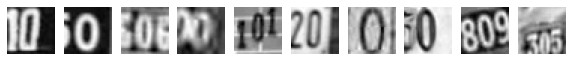

label for each of the above image: [0 0 0 0 0 0 0 0 0 0]


In [9]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

# Reshape and normalize the train and test features

Need to reshape the X_train and X_test so that the same can be fed for model building. We need to feed a 2D tensor into the model and currently we have a 3D tensor. 

- We will normalize the data. We divide by 255 as this is a grayscale image and can take values from 0-255

In [11]:
# # changing the datatype to float32 as most of deep learning libraries uses this format

# X_train = X_train.astype('float32')
# y_train = y_train.astype('float32')
# X_val = X_val.astype('float32')
# y_val = y_val.astype('float32')
# X_test = X_test.astype('float32')
# y_test = y_test.astype('float32')

# One hot encode the labels for train and test data and validation data

In [12]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the model architecture using TensorFlow with a flatten layer followed by dense layers with activation as ReLu and softmax.  

### I have taken 4 hidden layers

In [13]:
#Initialize Sequential model
model = tf.keras.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [14]:
#Add 1st hidden layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu'))
# model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.05))

In [15]:
#Add 2nd hidden layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64, kernel_initializer='he_normal', activation='relu'))
# model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.4))

In [16]:
#Add 3rd hidden layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64, kernel_initializer='he_normal', activation='relu'))
# model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.2))

In [17]:
#Add 4rd hidden layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32, kernel_initializer='he_normal', activation='relu'))
# model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.2))

In [18]:
#Add OUTPUT layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [19]:
#Learning Rate
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, amsgrad=False)

# Compile the model
model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1

# Fit and evaluate the model. Print the loss and accuracy for the test data

In [21]:
# Callbacks are used to save the best model during the training
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('mnist_v1.h5', save_best_only=True, monitor='val_accuracy', mode='max')

In [22]:
model.fit(X_train,y_train,          
          validation_data=(X_val,y_val),
          epochs=100,
          batch_size=32,
          callbacks=[model_checkpoint])

Epoch 1/100
1875/1875 [==============================] - 13s 5ms/step - loss: 2.2363 - accuracy: 0.1539 - val_loss: 1.5830 - val_accuracy: 0.4301
Epoch 2/100
1875/1875 [==============================] - 10s 5ms/step - loss: 1.7362 - accuracy: 0.3702 - val_loss: 1.2491 - val_accuracy: 0.5706
Epoch 3/100
1875/1875 [==============================] - 10s 5ms/step - loss: 1.5004 - accuracy: 0.4851 - val_loss: 1.0998 - val_accuracy: 0.6318
Epoch 4/100
1875/1875 [==============================] - 10s 5ms/step - loss: 1.4001 - accuracy: 0.5322 - val_loss: 1.0119 - val_accuracy: 0.6729
Epoch 5/100
1875/1875 [==============================] - 10s 5ms/step - loss: 1.3016 - accuracy: 0.5789 - val_loss: 0.8841 - val_accuracy: 0.7427
Epoch 6/100
1875/1875 [==============================] - 10s 5ms/step - loss: 1.2498 - accuracy: 0.6089 - val_loss: 0.8641 - val_accuracy: 0.7495
Epoch 7/100
1875/1875 [==============================] - 10s 5ms/step - loss: 1.2425 - accuracy: 0.6121 - val_loss: 0.7905 -

# Save the model

In [23]:
model.save('boston_housing_lr.h5')

In [24]:
!ls -l

total 7056
-rw-r--r-- 1 root root 3605976 Jan  6 12:02 boston_housing_lr.h5
drwx------ 4 root root    4096 Jan  6 11:42 drive
-rw-r--r-- 1 root root 3605976 Jan  6 12:02 mnist_v1.h5
drwxr-xr-x 1 root root    4096 Dec 21 17:29 sample_data


In [25]:
from google.colab import files

files.download('boston_housing_lr.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Fit and evaluate the model. Print the loss and accuracy for the test data

In [26]:
score, acc = model.evaluate(X_test, y_test, batch_size=32)

563/563 [==============================] - 1s 2ms/step - loss: 0.3564 - accuracy: 0.8966


In [27]:
print("Test loss is:", score)
print('Test accuracy is:', acc)

Test loss is: 0.35635894536972046
Test accuracy is: 0.8965555429458618


In [28]:
X_train[0:1].shape

(1, 32, 32)

In [29]:
input_data = np.expand_dims(X_test[0], axis=0)

#Model prediction
prediction = model.predict(input_data)

#Print prediction
print(prediction)

[[0.1322895  0.31288934 0.07758235 0.03049348 0.06502553 0.01465364
  0.03398674 0.17651536 0.07643872 0.08012542]]


In [30]:
#Get predicted number with highest probability
predicted_num = np.argmax(prediction[0])

#Print the number
print(predicted_num)

1


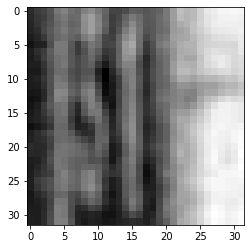

In [31]:
#Lets print the image as well
import matplotlib.pyplot as plt

plt.imshow(X_test[0],cmap='gray')